In [5]:
import pandas as pd
import numpy as np
import glob
#Path_prefix =  
#data1 = pd.read_csv('turnstile_190504.csv')
#data2 = pd.read_csv('turnstile_190511.csv')
#data = pd.concat([data1,data2])
#data.head()
#cd CSVs

In [6]:
cd CSVs

[Errno 2] No such file or directory: 'CSVs'
/Users/ritusinghal/Desktop/Metis/mta-project-1/CSVs


In [7]:
extension = 'txt'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]


#combine all files in the list
data = pd.concat([pd.read_csv(f) for f in all_filenames ])
data

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/11/2019,00:00:00,REGULAR,7053483,2390505
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/11/2019,04:00:00,REGULAR,7053511,2390508
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/11/2019,08:00:00,REGULAR,7053534,2390536
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/11/2019,12:00:00,REGULAR,7053618,2390596
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/11/2019,16:00:00,REGULAR,7053841,2390655
...,...,...,...,...,...,...,...,...,...,...,...
206852,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/03/2019,05:00:00,REGULAR,5554,376
206853,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/03/2019,09:00:00,REGULAR,5554,376
206854,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/03/2019,13:00:00,REGULAR,5554,376
206855,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/03/2019,17:00:00,REGULAR,5554,376


In [8]:
type(data['DATE'])

pandas.core.series.Series

In [9]:
data['Date_Time'] = pd.to_datetime(data['DATE'], cache=True) + pd.to_timedelta(data['TIME'])

In [10]:
data.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,Date_Time
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/11/2019,00:00:00,REGULAR,7053483,2390505,2019-05-11 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/11/2019,04:00:00,REGULAR,7053511,2390508,2019-05-11 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/11/2019,08:00:00,REGULAR,7053534,2390536,2019-05-11 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/11/2019,12:00:00,REGULAR,7053618,2390596,2019-05-11 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/11/2019,16:00:00,REGULAR,7053841,2390655,2019-05-11 16:00:00


In [11]:
data.dtypes

C/A                                                                             object
UNIT                                                                            object
SCP                                                                             object
STATION                                                                         object
LINENAME                                                                        object
DIVISION                                                                        object
DATE                                                                            object
TIME                                                                            object
DESC                                                                            object
ENTRIES                                                                          int64
EXITS                                                                            int64
Date_Time                                  

In [12]:
data.columns = data.columns.str.replace(' ', '')

In [13]:
data['Turnstile'] = data['C/A'] + data['UNIT'] + data['SCP'] + data['STATION']

In [14]:
entry_start = data.groupby(['DATE','Turnstile'], as_index = False).ENTRIES.min()

In [15]:
entry_end = data.groupby(['DATE','Turnstile'], as_index = False).ENTRIES.max()

In [16]:
traffic_entries = data.groupby(['DATE','Turnstile'], as_index = False).ENTRIES.agg(['max','min'])
traffic_exits = data.groupby(['DATE','Turnstile'], as_index = False).EXITS.agg(['max','min'])

In [17]:
traffic_entries['Daily Entries Traffic'] = traffic_entries['max'] - traffic_entries['min']

In [18]:
traffic_entries.head()

max      min  Daily Entries Traffic
DATE       Turnstile                                                     
03/30/2019 A002R05102-00-0059 ST  6999796  6999064                    732
           A002R05102-00-0159 ST  6239372  6238770                    602
           A002R05102-03-0059 ST  1211761  1211476                    285
           A002R05102-03-0159 ST  1049913  1049198                    715
           A002R05102-03-0259 ST  6133502  6132784                    718

In [19]:
traffic_exits['Daily Exits Traffic'] = traffic_exits['max'] - traffic_exits['min']

In [20]:
traffic_exits.head()

max      min  Daily Exits Traffic
DATE       Turnstile                                                   
03/30/2019 A002R05102-00-0059 ST  2373837  2373568                  269
           A002R05102-00-0159 ST  1399289  1399138                  151
           A002R05102-03-0059 ST  4554337  4553166                 1171
           A002R05102-03-0159 ST  1622549  1621305                 1244
           A002R05102-03-0259 ST  8280248  8279411                  837

In [21]:
data.iloc[:,-3]

0         2390505
1         2390508
2         2390536
3         2390596
4         2390655
           ...   
206852        376
206853        376
206854        376
206855        376
206856        376
Name: EXITS, Length: 2250808, dtype: int64

In [22]:
grouped = data.groupby(['DATE','Turnstile'], as_index=False).agg({'ENTRIES': ['min', 'max'], 'EXITS': ['min', 'max']})

In [23]:
grouped.head()

DATE              Turnstile  ENTRIES             EXITS         
                                          min      max      min      max
0  03/30/2019  A002R05102-00-0059 ST  6999064  6999796  2373568  2373837
1  03/30/2019  A002R05102-00-0159 ST  6238770  6239372  1399138  1399289
2  03/30/2019  A002R05102-03-0059 ST  1211476  1211761  4553166  4554337
3  03/30/2019  A002R05102-03-0159 ST  1049198  1049913  1621305  1622549
4  03/30/2019  A002R05102-03-0259 ST  6132784  6133502  8279411  8280248

In [24]:
grouped[('ENTRIES','Total_Entries')] = grouped[('ENTRIES','max')] - grouped[('ENTRIES', 'min')]

In [25]:
grouped[('EXITS','Total_Exits')] = grouped[('EXITS','max')] - grouped[('EXITS', 'min')]

In [26]:
grouped[('Total_Traffic','')] = grouped[('ENTRIES','Total_Entries')] + grouped[('EXITS', 'Total_Exits')]

In [27]:
grouped.head()

DATE              Turnstile  ENTRIES             EXITS           \
                                          min      max      min      max   
0  03/30/2019  A002R05102-00-0059 ST  6999064  6999796  2373568  2373837   
1  03/30/2019  A002R05102-00-0159 ST  6238770  6239372  1399138  1399289   
2  03/30/2019  A002R05102-03-0059 ST  1211476  1211761  4553166  4554337   
3  03/30/2019  A002R05102-03-0159 ST  1049198  1049913  1621305  1622549   
4  03/30/2019  A002R05102-03-0259 ST  6132784  6133502  8279411  8280248   

        ENTRIES       EXITS Total_Traffic  
  Total_Entries Total_Exits                
0           732         269          1001  
1           602         151           753  
2           285        1171          1456  
3           715        1244          1959  
4           718         837          1555

## Challenge 4

In [28]:
from pylab import rcParams

In [29]:
%matplotlib inline

In [30]:
rcParams['figure.figsize'] = 20,10

In [31]:
import matplotlib.pyplot as plt

In [32]:
plt.figure(figsize=(10,3))

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

In [33]:
test = 'A002R05102-00-0059 ST'

In [34]:
test_df = grouped[grouped.iloc[:,1] == test]

In [35]:
grouped[('Date_Time','')] = pd.to_datetime(grouped[('DATE','')], cache=True)
grouped[('Week_Day','')] = grouped[('Date_Time','')].dt.weekday
grouped.head()

DATE              Turnstile  ENTRIES             EXITS           \
                                          min      max      min      max   
0  03/30/2019  A002R05102-00-0059 ST  6999064  6999796  2373568  2373837   
1  03/30/2019  A002R05102-00-0159 ST  6238770  6239372  1399138  1399289   
2  03/30/2019  A002R05102-03-0059 ST  1211476  1211761  4553166  4554337   
3  03/30/2019  A002R05102-03-0159 ST  1049198  1049913  1621305  1622549   
4  03/30/2019  A002R05102-03-0259 ST  6132784  6133502  8279411  8280248   

        ENTRIES       EXITS Total_Traffic  Date_Time Week_Day  
  Total_Entries Total_Exits                                    
0           732         269          1001 2019-03-30        5  
1           602         151           753 2019-03-30        5  
2           285        1171          1456 2019-03-30        5  
3           715        1244          1959 2019-03-30        5  
4           718         837          1555 2019-03-30        5

In [36]:
grouped[('Date_Time','')]

0        2019-03-30
1        2019-03-30
2        2019-03-30
3        2019-03-30
4        2019-03-30
            ...    
372442   2019-06-14
372443   2019-06-14
372444   2019-06-14
372445   2019-06-14
372446   2019-06-14
Name: (Date_Time, ), Length: 372447, dtype: datetime64[ns]

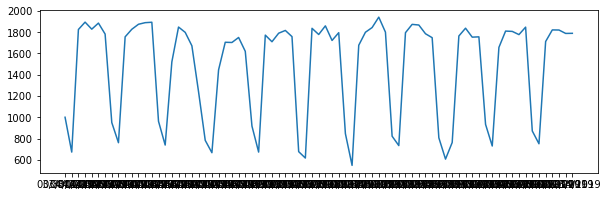

In [37]:
plt.figure(figsize=(10,3))
plt.plot(test_df[('DATE','')],test_df[('Total_Traffic','')])

## Challenge 6

In [38]:
data.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,Date_Time,Turnstile
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/11/2019,00:00:00,REGULAR,7053483,2390505,2019-05-11 00:00:00,A002R05102-00-0059 ST
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/11/2019,04:00:00,REGULAR,7053511,2390508,2019-05-11 04:00:00,A002R05102-00-0059 ST
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/11/2019,08:00:00,REGULAR,7053534,2390536,2019-05-11 08:00:00,A002R05102-00-0059 ST
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/11/2019,12:00:00,REGULAR,7053618,2390596,2019-05-11 12:00:00,A002R05102-00-0059 ST
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/11/2019,16:00:00,REGULAR,7053841,2390655,2019-05-11 16:00:00,A002R05102-00-0059 ST


In [39]:
data.shape

(2250808, 13)

In [40]:
station_entries = data.groupby(['DATE','STATION'], as_index = False).ENTRIES.agg(['max','min'])
station_exits = data.groupby(['DATE','STATION'], as_index = False).EXITS.agg(['max','min'])

In [41]:
station_entries['Daily Station Traffic'] = station_entries['max'] - station_entries['min']

In [42]:
station_exits['Daily Station Exits Traffic'] = station_exits['max'] - station_exits['min']

In [43]:
station_entries.head()

max      min  Daily Station Traffic
DATE       STATION                                                  
03/30/2019 1 AV            955292159   100798              955191361
           103 ST         2097077280   534967             2096542313
           103 ST-CORONA    15513634  1118239               14395395
           104 ST         2025908345   198508             2025709837
           110 ST           13815833  3425985               10389848

In [44]:
station_exits.head()

max      min  Daily Station Exits Traffic
DATE       STATION                                                        
03/30/2019 1 AV            998669812    12708                    998657104
           103 ST         1711173565   733881                   1710439684
           103 ST-CORONA    24431958   396701                     24035257
           104 ST         1907509946   127872                   1907382074
           110 ST           12418096  1358779                     11059317

In [45]:
station_grouped = data.groupby(['DATE','STATION'], as_index=False).agg({'ENTRIES': ['min', 'max'], 'EXITS': ['min', 'max']})

In [46]:
station_grouped[('ENTRIES','Station_Entries')] = station_grouped[('ENTRIES','max')] - station_grouped[('ENTRIES', 'min')]
station_grouped[('EXITS','Station_Exits')] = station_grouped[('EXITS','max')] - station_grouped[('EXITS', 'min')]
station_grouped[('Total_Traffic','')] = station_grouped[('ENTRIES','Station_Entries')] + station_grouped[('EXITS', 'Station_Exits')]

In [47]:
station_grouped.head()

DATE        STATION  ENTRIES                EXITS              \
                                  min         max      min         max   
0  03/30/2019           1 AV   100798   955292159    12708   998669812   
1  03/30/2019         103 ST   534967  2097077280   733881  1711173565   
2  03/30/2019  103 ST-CORONA  1118239    15513634   396701    24431958   
3  03/30/2019         104 ST   198508  2025908345   127872  1907509946   
4  03/30/2019         110 ST  3425985    13815833  1358779    12418096   

          ENTRIES         EXITS Total_Traffic  
  Station_Entries Station_Exits                
0       955191361     998657104    1953848465  
1      2096542313    1710439684    3806981997  
2        14395395      24035257      38430652  
3      2025709837    1907382074    3933091911  
4        10389848      11059317      21449165

In [48]:
test_station = station_grouped[station_grouped.iloc[:,1] == '103 ST-CORONA']
station_grouped[('Date_Time','')] = pd.to_datetime(station_grouped[('DATE','')], cache=True)
station_grouped[('Week_Day','')] = station_grouped[('Date_Time','')].dt.day_name()
station_grouped.head()
#station_grouped.reset_index()
#test_station.head()

DATE        STATION  ENTRIES                EXITS              \
                                  min         max      min         max   
0  03/30/2019           1 AV   100798   955292159    12708   998669812   
1  03/30/2019         103 ST   534967  2097077280   733881  1711173565   
2  03/30/2019  103 ST-CORONA  1118239    15513634   396701    24431958   
3  03/30/2019         104 ST   198508  2025908345   127872  1907509946   
4  03/30/2019         110 ST  3425985    13815833  1358779    12418096   

          ENTRIES         EXITS Total_Traffic  Date_Time  Week_Day  
  Station_Entries Station_Exits                                     
0       955191361     998657104    1953848465 2019-03-30  Saturday  
1      2096542313    1710439684    3806981997 2019-03-30  Saturday  
2        14395395      24035257      38430652 2019-03-30  Saturday  
3      2025709837    1907382074    3933091911 2019-03-30  Saturday  
4        10389848      11059317      21449165 2019-03-30  Saturday

In [61]:
#test_station1 = station_grouped_filtered[station_grouped_filtered.iloc[:,1] == '47-50 STS ROCK']

In [49]:
station_grouped.columns = ['DATE', 'STATION', 'ENTRIES_MIN', 'ENTRIES_MAX', 'EXITS_MIN', 'EXITS_MAX', 'ENTRIES', 'EXITS', 'Total_Traffic', 'Date_Time', 'Week_Day']

In [54]:
station_grouped.shape

(29023, 11)

In [55]:

from scipy import stats
station_grouped_filtered = station_grouped[(np.abs(stats.zscore(station_grouped['Total_Traffic'])) < 3)]

In [69]:
station_grouped_filtered.head()

,DATE,STATION,ENTRIES_MIN,ENTRIES_MAX,EXITS_MIN,EXITS_MAX,ENTRIES,EXITS,Total_Traffic,Date_Time,Week_Day
0,03/30/2019,1 AV,100798,955292159,12708,998669812,955191361,998657104,1953848465,2019-03-30,Saturday
2,03/30/2019,103 ST-CORONA,1118239,15513634,396701,24431958,14395395,24035257,38430652,2019-03-30,Saturday
4,03/30/2019,110 ST,3425985,13815833,1358779,12418096,10389848,11059317,21449165,2019-03-30,Saturday
5,03/30/2019,111 ST,0,50331793,354,16777216,50331793,16776862,67108655,2019-03-30,Saturday
6,03/30/2019,116 ST,39303,185438011,29201,218999087,185398708,218969886,404368594,2019-03-30,Saturday


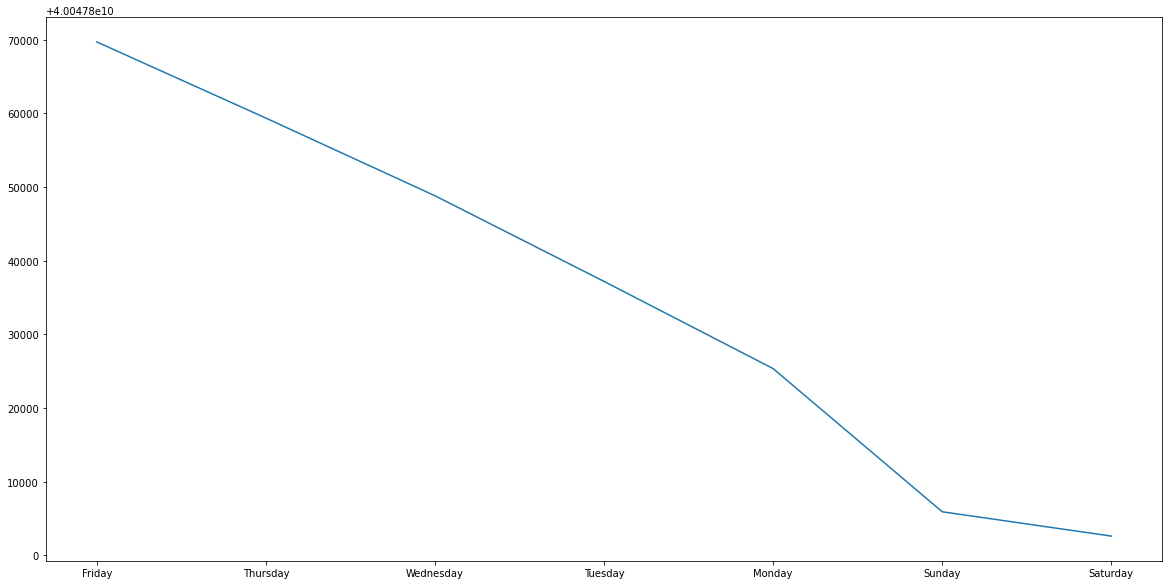

In [76]:

test_station1 = station_grouped_filtered[station_grouped_filtered['STATION'] == '183 ST']
test_station1.head()
Total_Weekly_ridership = test_station1.groupby(['Week_Day']).Total_Traffic.sum().reset_index()
Total_Weekly_ridership.sort_values(by=['Total_Traffic'],inplace = True, ascending = False)
Total_Weekly_ridership.head(10)
plt.plot(Total_Weekly_ridership['Week_Day'],Total_Weekly_ridership['Total_Traffic'])

In [56]:
Total_Weekly_ridership = station_grouped_filtered.groupby(['Week_Day']).Total_Traffic.sum().reset_index()

In [57]:
Total_Weekly_ridership.sort_values(by=['Total_Traffic'],inplace = True, ascending = False)
Total_Weekly_ridership.head(10)


,Week_Day,Total_Traffic
4,Thursday,2058348517236
0,Friday,2057091395538
6,Wednesday,2056058480398
5,Tuesday,2054883776265
3,Sunday,2053343138204
1,Monday,2051907051659
2,Saturday,2049981444801


<BarContainer object of 7 artists>

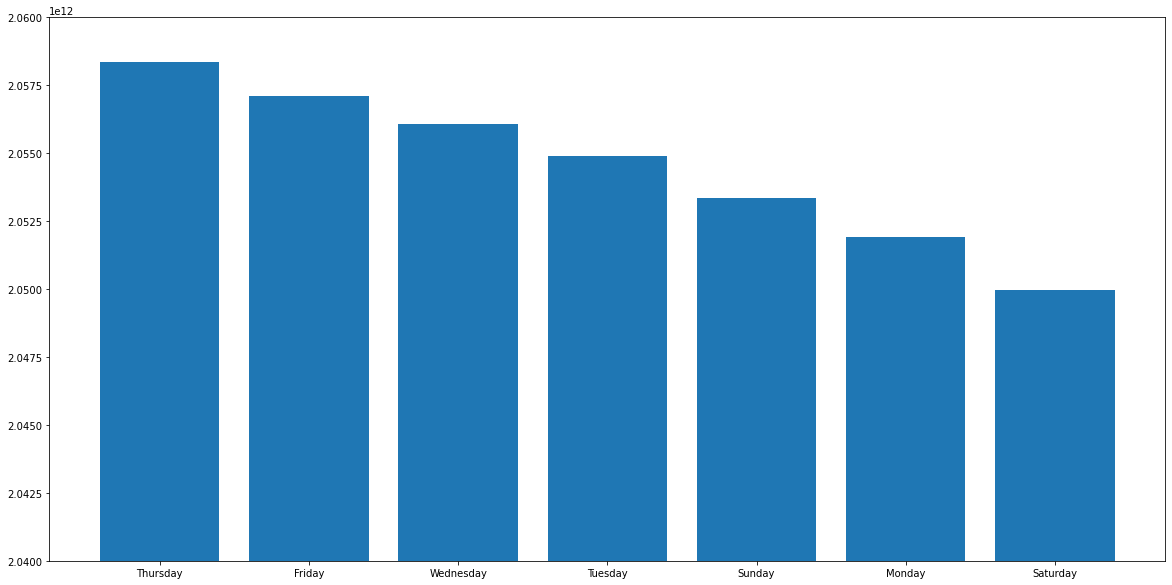

In [59]:
plt.ylim(2040000000000,2060000000000)
plt.bar(Total_Weekly_ridership['Week_Day'], Total_Weekly_ridership['Total_Traffic'])

In [85]:
#test_station = station_grouped[station_grouped.iloc[:,1] == '103 ST-CORONA']
station_grouped_filtered.columns = ['DATE', 'STATION', 'ENTRIES_MIN', 'ENTRIES_MAX', 'EXITS_MIN', 'EXITS_MAX', 'ENTRIES', 'EXITS', 'Total_Traffic', 'Date_Time', 'Week_Day']
#test_station.head()
#Answer = test_station.groupby(['Week_Day','Date_Time']).Total_Traffic.sum()
#fig, ax = plt.subplots(figsize=(15,7))
#test_station.groupby(['Week_Day','Date_Time']).Total_Traffic.sum().unstack().plot(ax=ax)
#type(Answer)
#Answer.shape
#plt.plot(Answer)
Total_ridership = station_grouped_filtered.groupby(['STATION']).Total_Traffic.sum().reset_index()
#Total_ridership = station_grouped_filtered.groupby(['STATION']).agg(Total_Traffic=('Total_traffic', sum),Week_Day = ('Week_Day')).reset_index()
type(Total_ridership)
Total_ridership


TypeError: Must provide 'func' or tuples of '(column, aggfunc).

In [90]:
Total_ridership.sort_values(by=['Total_Traffic'],inplace = True, ascending = False)
Total_ridership
Top5 = Total_ridership['STATION'][0:5].tolist()
#if "CANAL ST" in Top5:
 #   print("TRUE")
#plt.hist(Total_ridership['Total_Traffic'])
#station_grouped_filtered['STATION'].head()
Top5_stations = station_grouped_filtered[station_grouped_filtered['STATION'].isin(Top5)]
Top5_stations

,DATE,STATION,ENTRIES_MIN,ENTRIES_MAX,EXITS_MIN,EXITS_MAX,ENTRIES,EXITS,Total_Traffic,Date_Time,Week_Day
13,03/30/2019,14 ST,0,2129395010,0,1510951844,2129395010,1510951844,3640346854,2019-03-30,Saturday
35,03/30/2019,183 ST,3592344,1781110289,1995003,1865156784,1777517945,1863161781,3640679726,2019-03-30,Saturday
97,03/30/2019,72 ST,0,1513847549,0,1922243847,1513847549,1922243847,3436091396,2019-03-30,Saturday
172,03/30/2019,CANAL ST,0,1724104082,0,2030993952,1724104082,2030993952,3755098034,2019-03-30,Saturday
210,03/30/2019,ELMHURST AV,42140,1625418935,28088,1973044436,1625376795,1973016348,3598393143,2019-03-30,Saturday
...,...,...,...,...,...,...,...,...,...,...,...
28660,06/14/2019,14 ST,0,2129253221,0,1510847281,2129253221,1510847281,3640100502,2019-06-14,Friday
28682,06/14/2019,183 ST,3668572,1781199268,2039129,1865255078,1777530696,1863215949,3640746645,2019-06-14,Friday
28743,06/14/2019,72 ST,0,1513979854,0,1921959604,1513979854,1921959604,3435939458,2019-06-14,Friday
28817,06/14/2019,CANAL ST,0,1723862904,0,2031060855,1723862904,2031060855,3754923759,2019-06-14,Friday


In [95]:
Top5_station_weekly = Top5_stations.groupby(['STATION','Week_Day']).Total_Traffic.sum().reset_index()


In [113]:
stationlist = []
for i in range(0,29,7):
    stationlist.append([Top5_station_weekly.iloc[i:i+7,1:3]])
stationlist    


1

     STATION   Week_Day  Total_Traffic
21  CANAL ST     Friday    39029450012
22  CANAL ST     Monday    41305260192
23  CANAL ST   Saturday    41305293639
24  CANAL ST     Sunday    41305272206
25  CANAL ST   Thursday    41305177936
26  CANAL ST    Tuesday    41305235030
27  CANAL ST  Wednesday    41305207047
   STATION   Week_Day  Total_Traffic
7   183 ST     Friday    40047869713
8   183 ST     Monday    40047825333
9   183 ST   Saturday    40047802588
10  183 ST     Sunday    40047805890
11  183 ST   Thursday    40047859366
12  183 ST    Tuesday    40047837180
13  183 ST  Wednesday    40047848814
  STATION   Week_Day  Total_Traffic
0   14 ST     Friday    40042344463
1   14 ST     Monday    40042508117
2   14 ST   Saturday    40042552669
3   14 ST     Sunday    40042527139
4   14 ST   Thursday    40042387649
5   14 ST    Tuesday    40042470343
6   14 ST  Wednesday    40042429521
        STATION   Week_Day  Total_Traffic
28  ELMHURST AV     Friday    39581961994
29  ELMHURST AV     

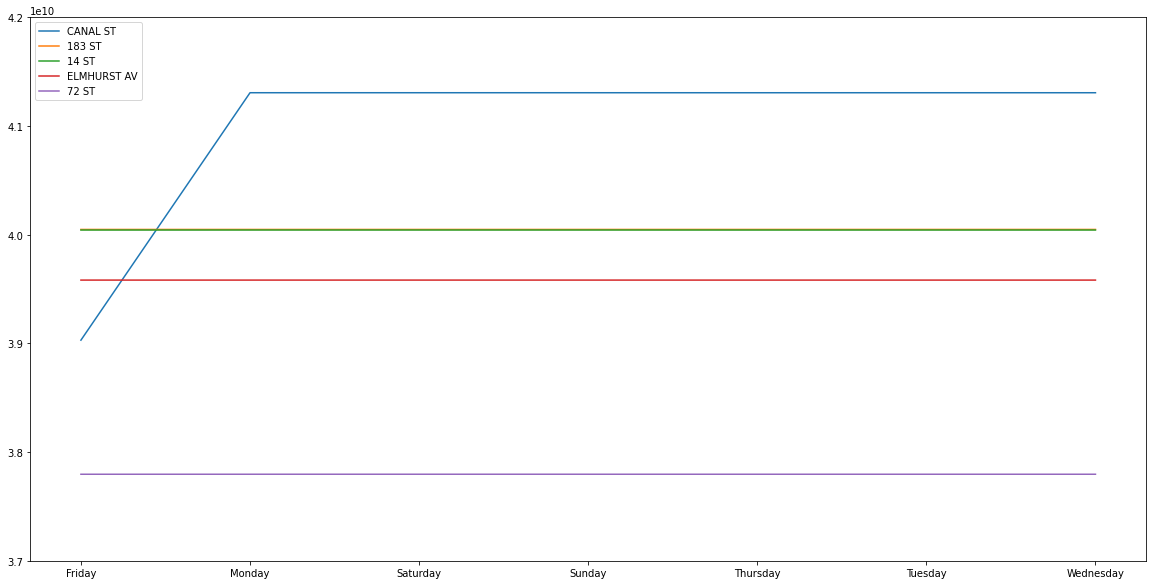

In [121]:
for stations in Top5:
    station = Top5_station_weekly[Top5_station_weekly['STATION'] == stations]
    print(station)
    plt.plot(station['Week_Day'],station['Total_Traffic'],label = stations)
plt.ylim(37000000000,42000000000)
plt.legend()
plt.show()    

TypeError: unhashable type: 'numpy.ndarray'

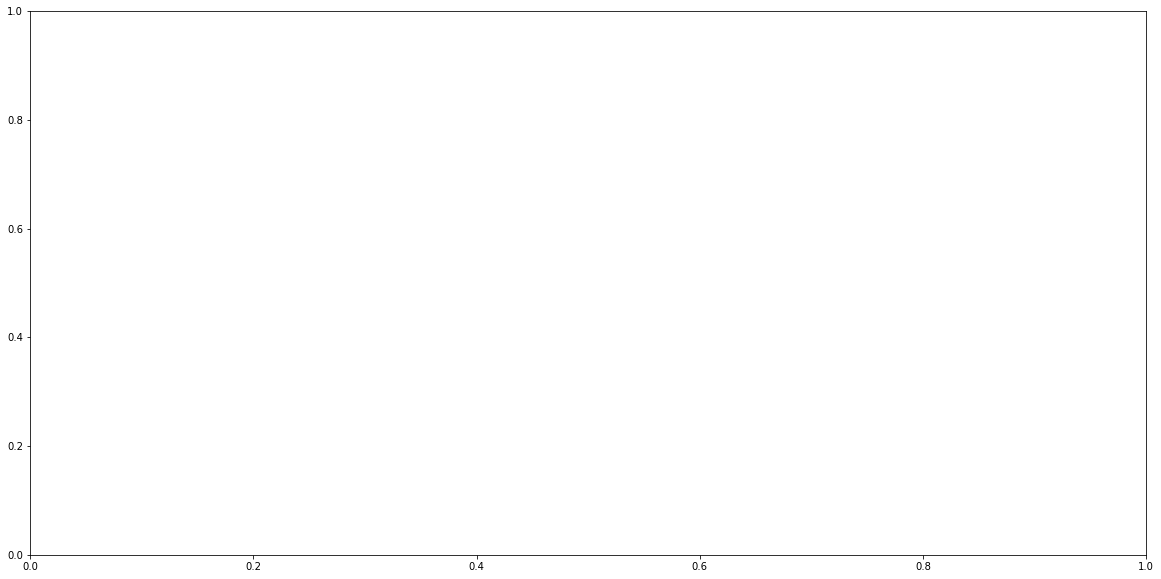

In [105]:
#import matplotlib.pyplot as plt
#for stations in stationlist:
#     timefilteredForce = plt.plot(stations)
#     timefilteredForce = plt.xlabel('points')
#     timefilteredForce = plt.ylabel('Force')

#plt.show()

(array([2., 2., 0., 0., 1., 0., 1., 1., 1., 2.]),
 array([5.03771384e+10, 5.08866265e+10, 5.13961146e+10, 5.19056027e+10,
        5.24150908e+10, 5.29245789e+10, 5.34340670e+10, 5.39435550e+10,
        5.44530431e+10, 5.49625312e+10, 5.54720193e+10]),
 <BarContainer object of 10 artists>)

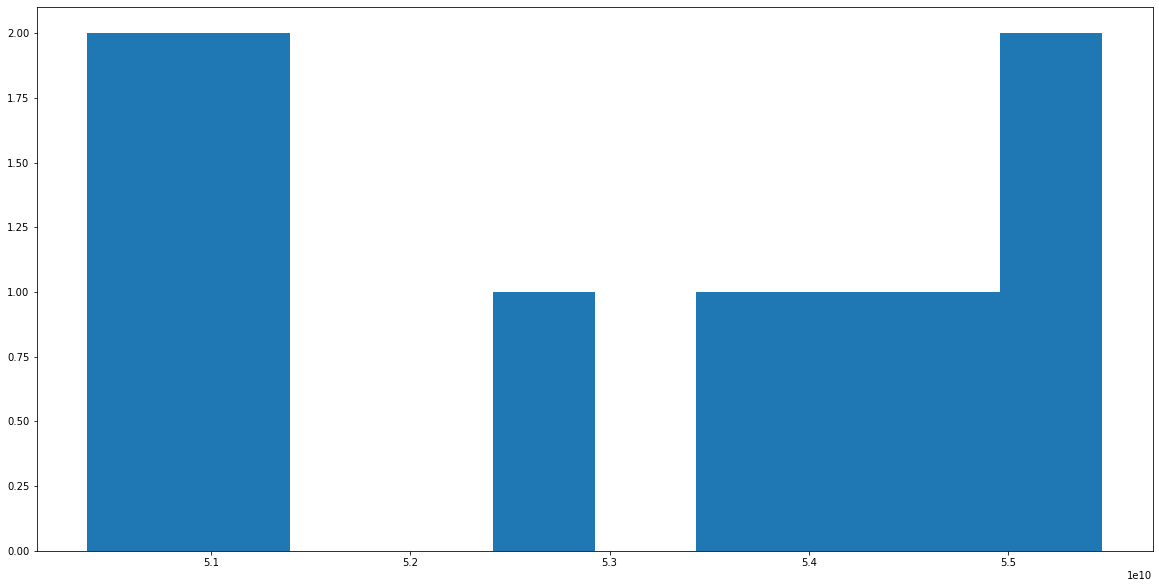

In [71]:
Row_list =[] 
indices = []
  
# Iterate over each row 
for index, rows in Total_ridership[:10].iterrows(): 
    # Create list for the current row 
#    my_list =[rows.STATION, rows.Total_Traffic] 
    my_list =rows.Total_Traffic 
    station_list = rows.STATION
    # append the list to the final list 
    Row_list.append(my_list) 
    indices.append(station_list)

Row_list    
#plt.ylim(50000000000,56000000000)
#plt.bar(Row_list) 
#plt.hist([[x for x in y] for y in Row_list])
plt.hist(Row_list)
#plt.xticks(rotation = 'vertical')


In [72]:
indices

['47-50 STS ROCK',
 '104 ST',
 'CHAMBERS ST',
 '42 ST-PORT AUTH',
 'HIGH ST',
 'CANAL ST',
 '183 ST',
 '14 ST',
 '23 ST',
 'ELMHURST AV']

<BarContainer object of 10 artists>

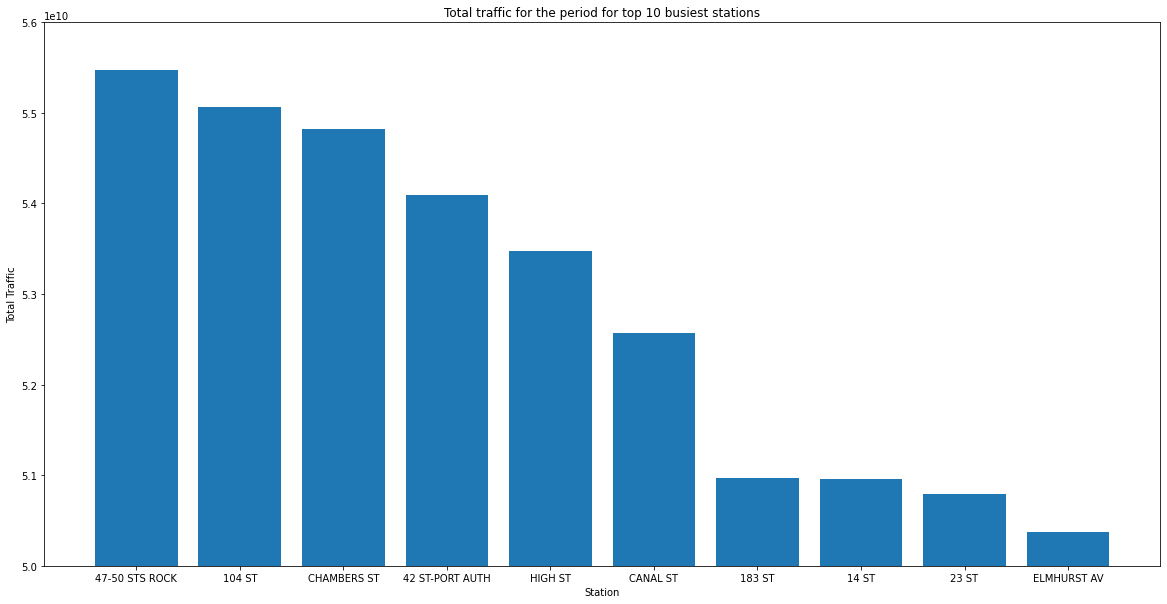

In [75]:
#indices = range(len(Row_list))
plt.ylim(50000000000,56000000000)
plt.xlabel("Station")
plt.ylabel("Total Traffic")
plt.title("Total traffic for the period for top 10 busiest stations")
plt.bar(indices, Row_list)

In [73]:
test_station.sort_values(by=[('Week_Day','')], inplace = True)

<ipython-input-73-f06c79419715>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_station.sort_values(by=[('Week_Day','')], inplace = True)


## Challenge 7

In [65]:
plt.figure(figsize=(10,3))
#plt.plot(test_station[('Week_Day','')],test_station[('Total_Traffic','')])
test_station1.head()
#plt.plot(test_station1['Week_Day'],test_station['Total_Traffic'])

,DATE,STATION,ENTRIES_MIN,ENTRIES_MAX,EXITS_MIN,EXITS_MAX,ENTRIES,EXITS,Total_Traffic,Date_Time,Week_Day


<Figure size 720x216 with 0 Axes>

### New CSV File

In [75]:
data2 = pd.read_csv('turnstile_190511.csv')
data2.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/04/2019,00:00:00,REGULAR,7044468,2387700
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/04/2019,04:00:00,REGULAR,7044495,2387706
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/04/2019,08:00:00,REGULAR,7044509,2387740
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/04/2019,12:00:00,REGULAR,7044568,2387757
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/04/2019,16:00:00,REGULAR,7044743,2387774
